<a href="https://colab.research.google.com/github/jaekyoungkim/tensor2ml_NLP/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%99%80_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9C%BC%EB%A1%9C_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC(ch6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ch 6 챗봇 만들기
# 텍스트 생성 
# 챗봇 제작 방법은 매우 다양 : 규칙 기반으로 제작, 머신러닝을 활용한 유사도 기반, 규칙과 머신러닝을 섞은 하이브리드형, 시나리오 기반 등 다양함
# 여기서는 딥러닝 기반한 챗봇을 수행하고자 함
# seq2seq 모델 기반의 챗봇

In [85]:
# 공개된 챗봇을 위한 한글 데이터는 거의 없다고 봐도 무방함. chatbot_data_for_korea v1.0 있긴함
# ubuntu   dialogue corpus 를 제외하면 영어 데이터도 없다고 볼 수 있음
# https://github.com/songys/Chatbot

!git clone https://github.com/songys/Chatbot

Cloning into 'Chatbot'...
remote: Enumerating objects: 78, done.
remote: Total 78 (delta 0), reused 0 (delta 0), pack-reused 78
Unpacking objects: 100% (78/78), done.


In [86]:
!git clone https://github.com/NLP-kr/tensorflow-ml-nlp-tf2.git

fatal: destination path 'tensorflow-ml-nlp-tf2' already exists and is not an empty directory.


In [ ]:
import pandas as pd
DATA_IN_PATH = '/content/'
data = pd.read_csv(DATA_IN_PATH + 'tensorflow-ml-nlp-tf2/6.CHATBOT/data_in/ChatBotData.csv',encoding='utf-8')

In [89]:
data.head(50)
# 데이터 구조는 qa값인 질문과 대답 텍스트를 가지고 있고, 그에 대한 라벨값을 가지고 있음. 
# 0,1,2의 라벨값을 가지고 있음

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
5,SD카드 망가졌어,다시 새로 사는 게 마음 편해요.,0
6,SD카드 안돼,다시 새로 사는 게 마음 편해요.,0
7,SNS 맞팔 왜 안하지ㅠㅠ,잘 모르고 있을 수도 있어요.,0
8,SNS 시간낭비인 거 아는데 매일 하는 중,시간을 정하고 해보세요.,0
9,SNS 시간낭비인데 자꾸 보게됨,시간을 정하고 해보세요.,0


In [ ]:
# 문장 전체에 대한 분석
sentences = list(data['Q']) + list(data['A']) ; sentences

['12시 땡!',
 '1지망 학교 떨어졌어',
 '3박4일 놀러가고 싶다',
 '3박4일 정도 놀러가고 싶다',
 'PPL 심하네',
 'SD카드 망가졌어',
 'SD카드 안돼',
 'SNS 맞팔 왜 안하지ㅠㅠ',
 'SNS 시간낭비인 거 아는데 매일 하는 중',
 'SNS 시간낭비인데 자꾸 보게됨',
 'SNS보면 나만 빼고 다 행복해보여',
 '가끔 궁금해',
 '가끔 뭐하는지 궁금해',
 '가끔은 혼자인게 좋다',
 '가난한 자의 설움',
 '가만 있어도 땀난다',
 '가상화폐 쫄딱 망함',
 '가스불 켜고 나갔어',
 '가스불 켜놓고 나온거 같아',
 '가스비 너무 많이 나왔다.',
 '가스비 비싼데 감기 걸리겠어',
 '가스비 장난 아님',
 '가장 확실한 건 뭘까?',
 '가족 여행 가기로 했어',
 '가족 여행 고고',
 '가족 여행 어디로 가지?',
 '가족 있어?',
 '가족관계 알려 줘',
 '가족끼리 여행간다.',
 '가족들 보고 싶어',
 '가족들이랑 서먹해',
 '가족들이랑 서먹해졌어',
 '가족들이랑 어디 가지?',
 '가족들이랑 여행 갈거야',
 '가족여행 가야지',
 '가족이 누구야?',
 '가족이랑 여행 가려고',
 '가족한테 스트레스 풀었어',
 '가출할까?',
 '가출해도 갈 데가 없어',
 '간만에 떨리니까 좋더라',
 '간만에 쇼핑 중',
 '간만에 휴식 중',
 '간식 뭐 먹을까',
 '간식 추천',
 '간장치킨 시켜야지',
 '간접흡연 싫어',
 '갈까 말까 고민 돼',
 '갈까 말까?',
 '감 말랭이 먹고 싶다.',
 '감 말랭이 먹어야지',
 '감기 같애',
 '감기 걸린 것 같아',
 '감기 기운이 있어',
 '감기 들 거 같애',
 '감기가 오려나',
 '감기약이 없어',
 '감기인거 같애',
 '감미로운 목소리 좋아',
 '감정이 쓰레기통처럼 엉망진창이야',
 '감정컨트롤을 못하겠어',
 '감정컨트롤이 안돼',
 '감히 나를 무시하는 애가 있어',
 '갑자기 나쁜 생각이 막 들더라',
 '갑자기 눈물 나',

In [90]:
!pip install konlpy

In [91]:
# 문장단위의 길이분석, 단어단위의 길이 분석, 형태소 단위의 길이 분석을 진행함
tokenized_sentences = [s.split() for s in sentences] # 띄어쓰기 기준으로 token을 분류
sent_len_by_token = [len(t) for t in tokenized_sentences]    # 각 토큰의 길이를 구함
sent_len_by_eumjul = [len(s.replace(' ','')) for s in sentences]  # 모든 단어 숫자들을 구함

from konlpy.tag import Twitter, Okt
okt = Okt()
morph_tokenized_senteces = [okt.morphs(s.replace(' ', '')) for s in sentences] # 형태소 단위로 나눔
sent_len_by_morph = [len(t) for t in morph_tokenized_senteces]  # 각 형태소의 길이를 계산


In [ ]:
tokenized_sentences

[['12시', '땡!'],
 ['1지망', '학교', '떨어졌어'],
 ['3박4일', '놀러가고', '싶다'],
 ['3박4일', '정도', '놀러가고', '싶다'],
 ['PPL', '심하네'],
 ['SD카드', '망가졌어'],
 ['SD카드', '안돼'],
 ['SNS', '맞팔', '왜', '안하지ㅠㅠ'],
 ['SNS', '시간낭비인', '거', '아는데', '매일', '하는', '중'],
 ['SNS', '시간낭비인데', '자꾸', '보게됨'],
 ['SNS보면', '나만', '빼고', '다', '행복해보여'],
 ['가끔', '궁금해'],
 ['가끔', '뭐하는지', '궁금해'],
 ['가끔은', '혼자인게', '좋다'],
 ['가난한', '자의', '설움'],
 ['가만', '있어도', '땀난다'],
 ['가상화폐', '쫄딱', '망함'],
 ['가스불', '켜고', '나갔어'],
 ['가스불', '켜놓고', '나온거', '같아'],
 ['가스비', '너무', '많이', '나왔다.'],
 ['가스비', '비싼데', '감기', '걸리겠어'],
 ['가스비', '장난', '아님'],
 ['가장', '확실한', '건', '뭘까?'],
 ['가족', '여행', '가기로', '했어'],
 ['가족', '여행', '고고'],
 ['가족', '여행', '어디로', '가지?'],
 ['가족', '있어?'],
 ['가족관계', '알려', '줘'],
 ['가족끼리', '여행간다.'],
 ['가족들', '보고', '싶어'],
 ['가족들이랑', '서먹해'],
 ['가족들이랑', '서먹해졌어'],
 ['가족들이랑', '어디', '가지?'],
 ['가족들이랑', '여행', '갈거야'],
 ['가족여행', '가야지'],
 ['가족이', '누구야?'],
 ['가족이랑', '여행', '가려고'],
 ['가족한테', '스트레스', '풀었어'],
 ['가출할까?'],
 ['가출해도', '갈', '데가', '없어'],
 ['간만에', '떨리니까', '좋더라'],
 ['간만에'

In [ ]:
sent_len_by_token

[2,
 3,
 3,
 4,
 2,
 2,
 2,
 4,
 7,
 4,
 5,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 2,
 3,
 2,
 3,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 1,
 4,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 4,
 2,
 4,
 3,
 2,
 4,
 3,
 4,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 5,
 5,
 3,
 3,
 6,
 4,
 3,
 5,
 4,
 2,
 3,
 4,
 4,
 6,
 4,
 5,
 4,
 8,
 2,
 4,
 1,
 1,
 2,
 2,
 2,
 3,
 2,
 1,
 4,
 4,
 4,
 1,
 1,
 2,
 3,
 4,
 5,
 5,
 1,
 2,
 5,
 3,
 3,
 3,
 5,
 2,
 3,
 2,
 2,
 2,
 4,
 4,
 2,
 5,
 2,
 2,
 1,
 2,
 1,
 3,
 5,
 1,
 3,
 4,
 4,
 5,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 4,
 3,
 2,
 3,
 4,
 2,
 5,
 3,
 4,
 3,
 2,
 2,
 3,
 3,
 3,
 5,
 3,
 7,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 3,
 4,
 3,
 3,
 4,
 5,
 3,
 3,
 3,
 3,
 2,
 3,
 4,
 4,
 3,
 2,
 3,
 2,
 3,
 4,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 4,
 3,
 3,
 6,
 3,
 1,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 4,
 5,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 5,
 3,
 6,
 5,
 2,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 1,
 3,
 4,
 4,
 2,
 2,
 3,
 2,
 5,
 3,
 3,
 2,


Text(0, 0.5, 'number of sentences')

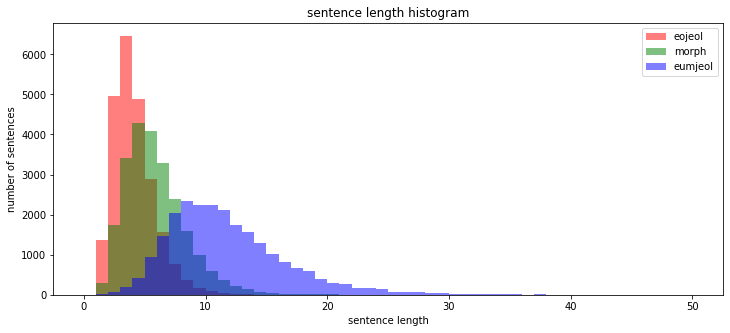

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color='r', label = 'eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label = 'morph')
plt.hist(sent_len_by_eumjul, bins=50, range=[0,50], alpha=0.5, color='b', label = 'eumjeol')

plt.legend()

plt.title("sentence length histogram")
plt.xlabel('sentence length')
plt.ylabel('number of sentences')


Text(0, 0.5, 'number of sentences')

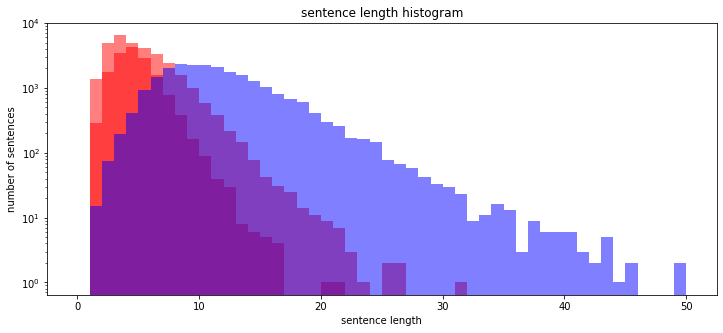

In [ ]:
plt.figure(figsize = (12,5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha =0.5 , color ='r' ,label = 'eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha =0.5 , color ='r' ,label = 'morph')
plt.hist(sent_len_by_eumjul, bins=50, range=[0,50], alpha =0.5 , color ='b' ,label = 'eumjeol')
plt.yscale('log')
plt.title('sentence length histogram')
plt.xlabel('sentence length')
plt.ylabel('number of sentences')

In [ ]:
import numpy as np
print('어절최대길이 {}:'.format(np.max(sent_len_by_token)))
print('어절최소길이 {}:'.format(np.min(sent_len_by_token)))
print('어절평균길이 {:.2f}:'.format(np.mean(sent_len_by_token)))  # .2f  두자리수까지만 보여주기

어절최대길이 21:
어절최소길이 1:
어절평균길이 3.64:


{'boxes': [<matplotlib.lines.Line2D at 0x7fbfa9523c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbfa951fbd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbfa94cc150>,
 'means': [<matplotlib.lines.Line2D at 0x7fbfa94c6c10>,
 'medians': [<matplotlib.lines.Line2D at 0x7fbfa94c66d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbfa951c550>,
  <matplotlib.lines.Line2D at 0x7fbfa94c2d10>]}

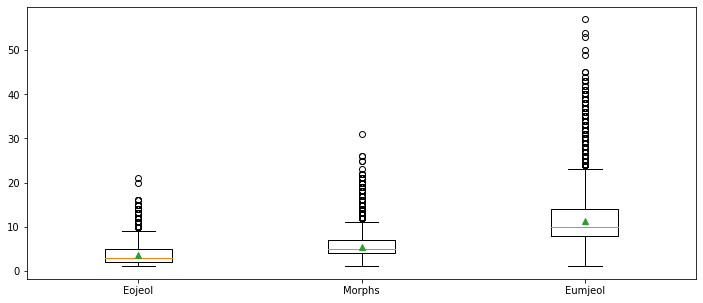

In [ ]:
plt.figure(figsize =(12,5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjul], labels = ['Eojeol','Morphs','Eumjeol'], showmeans=True)
# 긴꼬리 형태의 박스플롯이 생성되

In [92]:
# 질문 답변에 각각에 대한 문장 길이 분포 분석
query_sentences = list(data['Q']) ; query_sentences
answer_sentences = list(data['A'])
query_morph_tokenized_sentences = [okt.morphs(s.replace(' ','')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]



In [93]:
answer_morph_tokenized_senteces = [okt.morphs(s.replace(' ','')) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_morph_tokenized_senteces]

Text(0, 0.5, 'number of queries')

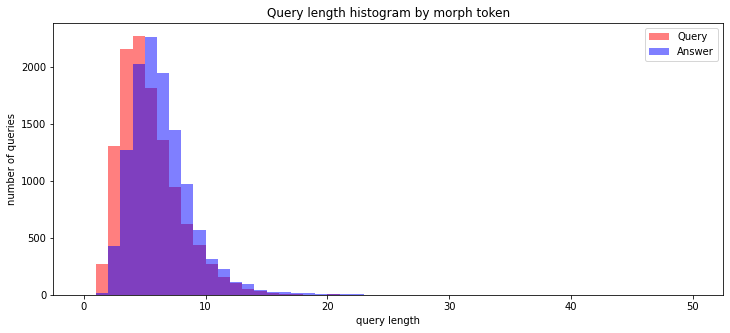

In [ ]:
plt.figure(figsize = (12,5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50], alpha =0.5 , color ='r' ,label = 'Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50], alpha =0.5 , color ='b' ,label = 'Answer')

plt.legend()

plt.title('Query length histogram by morph token')
plt.xlabel('query length')
plt.ylabel('number of queries')
# 질문 길이가 응답문장보다 상대적으로 짧은것을 확인

Text(0, 0.5, 'number of queries')

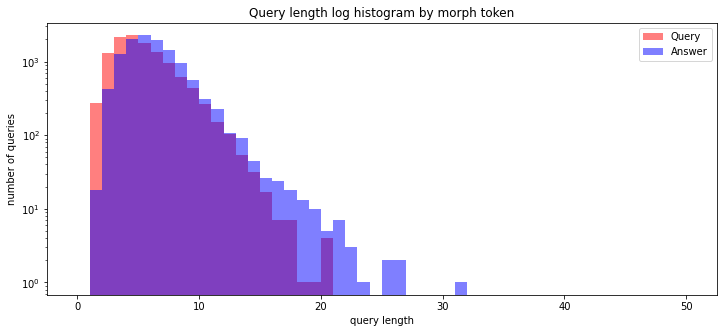

In [ ]:
plt.figure(figsize = (12,5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50], alpha =0.5 , color ='r' ,label = 'Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50], alpha =0.5 , color ='b' ,label = 'Answer')

plt.legend()
plt.yscale('log', nonposy='clip')

plt.title('Query length log histogram by morph token')
plt.xlabel('query length')
plt.ylabel('number of queries')
# 답변 데이터가 질문 데이터보다 좀더 이상치 값이 많은것을 확인
# 문장길이를 25로 설정함

{'boxes': [<matplotlib.lines.Line2D at 0x7fbfa8479f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbfa849b050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbfa84a0090>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbfa849bb10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbfa8497590>,
  <matplotlib.lines.Line2D at 0x7fbfa8425090>]}

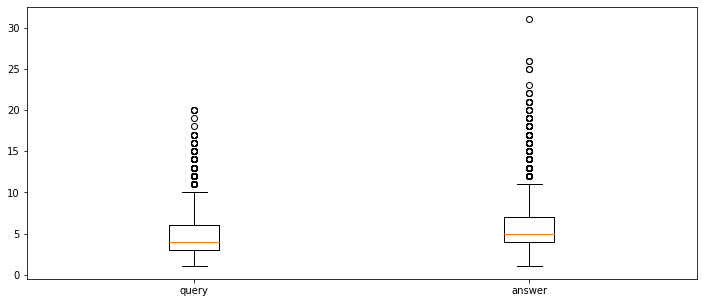

In [ ]:
plt.figure(figsize = (12,5))
plt.boxplot([query_sent_len_by_morph, answer_sent_len_by_morph], labels = ['query','answer'])

In [ ]:
# 데이터 어휘 빈도 분석, konlpy의 pos-tagging
okt.pos('오늘밤은유난히덥구나')

[('오늘밤', 'Noun'), ('은', 'Josa'), ('유난히', 'Adverb'), ('덥구나', 'Adjective')]

In [94]:
query_NVA_token_sentence = list() # noun, verb, adjective 
answer_NVA_token_sentence = list() # noun, verb, adjective 
for s in query_sentences:
  for token, tag in okt.pos(s.replace(' ','')):
    if tag =='Noun' or tag=='Verb' or tag=='Adjective':
      query_NVA_token_sentence.append(token)

# wordcloud를 생성하기 위해 따로 문장 구분을 하지않고 다 이어붙인것
for s in answer_sentences:
  temp_token_bucket = list()
  for token, tag in okt.pos(s.replace(' ','')):
    if tag =='Noun' or  tag=='Verb' or tag=='Adjective':
      answer_NVA_token_sentence.append(token)
query_NVA_token_sentence = ' '.join(query_NVA_token_sentence)  # 하나로 합치는 과정임 - sentence에 nva만 남아있는 문장이 완성됨
answer_NVA_token_sentence = ' '.join(answer_NVA_token_sentence)

In [ ]:
query_NVA_token_sentence

'지망 학교 떨어졌어 박 박 심하네 카드 망가졌어 카드 돼 맞팔 왜 안하지 시간 낭비 아는데 매일 중 시간 낭비 자꾸 보게 됨 보면나만 빼고다 행복해 보여 가끔 궁금해 가끔 뭐 하는지 궁금해 가끔 혼자 좋다 가난한 자의 설움 가만있어도 땀 가상 화폐 쫄 망함 가스 불 켜고 나갔어 가스 불 켜놓고 나온거 같아 가스 비 나왔다 가스 비비 싼데 감기 걸리겠어 가스 비장 아님 가장 확실한건 뭘 까 가족 여행 가기 했어 가족 여행 고고 가족 여행 어디 가지 가족 있어 가족 관계 알려줘 가족 끼리 여행 간다 가족 보고싶어 가족 서먹해 가족 서먹해졌어 가족 어디가 가족 여행 갈거야 가족 여행 가야 가족 누구 가족 여행가 려고 가족 스트레스 풀었어 가출 할까 가출 해도 갈데가 없어 간만 떨리니까 좋더라 간만 쇼핑 간만 휴식 간식 뭐 먹을까 간식 추천 간장 치킨 시켜야지 간접흡연 싫어 고민 돼 감 말랭이 먹고싶다 감 말랭이 먹어야지 감기 같 애 감기 걸린것 같아 감기 기운이있어 감기 들거 같 애 감기가오려나 감기 약 없어 감기 같 애 감미로운 목소리 좋아 감정 쓰레기통 엉망 진창 감정 컨트롤 하겠어 감정 컨트롤 이안 돼 감히 나를 무시 애가 있어 갑자기 나쁜 생각 막 들더라 갑자기 눈물나 갑자기 물어봐서 당황 했어 갑자기 불편한 사이 된거 같아 강렬한 첫인상 남겨야하는데 강아지 키우고싶어 강아지 키우고싶은데 역시안 돼겠지 강아지 키울수있을까 강아지 키울까 강원도 가서 살까 게임 자고 해도되 나 놀러 갈 친구 없어 먹었는데 나 살찐거 같아 수영장 가기 했어 같이있으면 힘든데 붙잡고싶어 피씨 방가 해볼까 할수있는 취미 생활 뭐 있을까 개강 입어볼까 개강 옷 예쁘게 입어볼까 개강 개강 개 같은 상황 개 되 버렸어 개 기름 꼈어 개념 놓고 옴 개념 없어 개 당황 개 당황 했잖아 갑자기 물어봐서 개인 업무 다시 켜 개인 일도 시켜 개 졸려 개 좋아 개학 좋다 무 싫다 걔 누굴 닮아서 그런거니 걔 같은 반 됐으면 좋겠다 거지같 이일해 놓고 갔어 거지 됐어 거짓말 했어 거짓말 나도 모르게

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot  as plt

query_wordcloud = WordCloud(font_path = '/content/NanumGothicLight.ttf').generate(query_NVA_token_sentence)

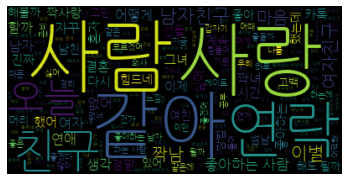

In [ ]:
plt.imshow(query_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

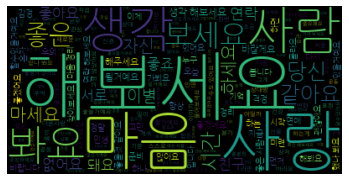

In [ ]:
#답변 데이터도 동일하게 워드클라우드를 그려서 살펴보기
answer_wordcloud = WordCloud(font_path = '/content/NanumGothicLight.ttf').generate(answer_NVA_token_sentence)
plt.imshow(answer_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# seq2seq

In [ ]:
# seq2seq 모델로 챗봇 만들기
# 기계번역, 이미지 설명, 텍스트 오약등 다양한 분야에서 활용되고 있음
# rnn을 기반으로 하며, 인코더와 디코더로 구성됨
# 모델 구현(파이썬 파일+주피터 노트북 파일)



In [95]:
############ preprocess.py 파일 만들기 ###############
import os
import re
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
from konlpy.tag import Okt


In [96]:
FILTER = "([~.,!?\"':;)(])"
PAD = "<PAD>"  # 어떤 의미도 없는 패딩 토큰
STD = "<SOS>"  # 시작토큰
END = "<END>"  # 마지막 토큰
UNK = "<UNK>"  # 사전에 없는 단어
PAD_INDEX = 0
STD_INDEX = 1
END_INDEX = 2
UNK_INDEX = 3
MARKER = [PAD,STD, END, UNK]
CHANGE_FILTER = re.compile(FILTER)
MAX_SEQUENCE = 25

In [ ]:
def load_data(path):
    # 판다스를 통해서 데이터를 불러온다.
    data_df = pd.read_csv(path, header=0)
    # 질문과 답변 열을 가져와 question과 answer에 넣는다.
    question, answer = list(data_df['Q']), list(data_df['A'])

    return question, answer  # question 과  answer 데이터를 불러옴

In [163]:

def data_tokenizer(data):
    # 토크나이징 해서 담을 배열 생성
    words = []
    for sentence in data: 
        # FILTERS = "([~.,!?\"':;)(])"
        # 위 필터와 같은 값들을 정규화 표현식을
        # 통해서 모두 "" 으로 변환 해주는 부분이다.
        sentence = re.sub(CHANGE_FILTER, "", sentence) # filter에 해당되는것들을 다 지우기
        for word in sentence.split(): # 문장을 빈칸기준으로 word로 쪼개서 words 에 넣기
            words.append(word)
    # 토그나이징과 정규표현식을 통해 만들어진
    # 값들을 넘겨 준다.
    return [word for word in words if word]  # 전체 데이터의 모든 단어를 포함하는 단어 리스트 만들기

In [164]:
# 형태소로 분리하는 함수
def prepro_like_morphlized(data):
    morph_analyzer = Okt()
    result_data = list()
    for seq in tqdm(data):
        morphlized_seq = " ".join(morph_analyzer.morphs(seq.replace(' ', '')))
        result_data.append(morphlized_seq)

    return result_data

In [166]:
def load_vocabulary(path, vocab_path, tokenize_as_morph=False):
    # 사전을 담을 배열 준비한다.
    vocabulary_list = []
    # 사전을 구성한 후 파일로 저장 진행한다.
    # 그 파일의 존재 유무를 확인한다.
    if not os.path.exists(vocab_path):   # 단어사전 파일이 있다면 불러와서 사용, 디렉토리 있는지 확인 
        # 이미 생성된 사전 파일이 존재하지 않으므로
        # 데이터를 가지고 만들어야 한다.
        # 그래서 데이터가 존재 하면 사전을 만들기 위해서
        # 데이터 파일의 존재 유무를 확인한다.
        if (os.path.exists(path)):   # 디렉토리 있는지 확인
            # 데이터가 존재하니 판단스를 통해서
            # 데이터를 불러오자
            data_df = pd.read_csv(path, encoding='utf-8')
            # 판다스의 데이터 프레임을 통해서
            # 질문과 답에 대한 열을 가져 온다.
            question, answer = list(data_df['Q']), list(data_df['A'])
            if tokenize_as_morph:  # 형태소에 따른 토크나이져 처리
                question = prepro_like_morphlized(question)
                answer = prepro_like_morphlized(answer)
            data = []
            # 질문과 답변을 extend을
            # 통해서 구조가 없는 배열로 만든다.
            data.extend(question)    # data에 question 넣기
            data.extend(answer)     # data에 answer 넣기
            # 토큰나이져 처리 하는 부분이다.
            words = data_tokenizer(data)  # data에 넣은 것들을 토크나이저로 월드로 만들기
            # 공통적인 단어에 대해서는 모두
            # 필요 없으므로 한개로 만들어 주기 위해서
            # set해주고 이것들을 리스트로 만들어 준다.
            words = list(set(words))   # set 형태로 만들기, 중복이 제거가됨
            # 데이터 없는 내용중에 MARKER를 사전에
            # 추가 하기 위해서 아래와 같이 처리 한다.
            # 아래는 MARKER 값이며 리스트의 첫번째 부터
            # 순서대로 넣기 위해서 인덱스 0에 추가한다.
            # PAD = "<PADDING>"
            # STD = "<START>"
            # END = "<END>"
            # UNK = "<UNKNWON>"
            words[:0] = MARKER
        # 사전을 리스트로 만들었으니 이 내용을
        # 사전 파일을 만들어 넣는다.
        with open(vocab_path, 'w', encoding='utf-8') as vocabulary_file:
            for word in words:
                vocabulary_file.write(word + '\n')

    # 사전 파일이 존재하면 여기에서
    # 그 파일을 불러서 배열에 넣어 준다.
    with open(vocab_path, 'r', encoding='utf-8') as vocabulary_file:
        for line in vocabulary_file:
            vocabulary_list.append(line.strip())

    # 배열에 내용을 키와 값이 있는
    # 딕셔너리 구조로 만든다.
    char2idx, idx2char = make_vocabulary(vocabulary_list)
    # 두가지 형태의 키와 값이 있는 형태를 리턴한다.
    # (예) 단어: 인덱스 , 인덱스: 단어)
    return char2idx, idx2char, len(char2idx)


In [167]:
# 단어 리스트를 인자로 받는다. 이 리스트를 활용해 두개의 딕셔너리를 만들기
# 리스트를 키가 단어이고 값이 인덱스 딕셔너리를 만든다.
def make_vocabulary(vocabulary_list):
    # 리스트를 키가 단어이고 값이 인덱스인
    # 딕셔너리를 만든다.
    char2idx = {char: idx for idx, char in enumerate(vocabulary_list)}
    # 리스트를 키가 인덱스이고 값이 단어인
    # 딕셔너리를 만든다.
    idx2char = {idx: char for idx, char in enumerate(vocabulary_list)}
    # 두개의 딕셔너리를 넘겨 준다.
    return char2idx, idx2char

In [168]:
word2idx

{'<PAD>': 0,
 '<SOS>': 1,
 '<END>': 2,
 '<UNK>': 3,
 '상담': 4,
 '나가볼까': 5,
 '지압이나': 6,
 '점이': 7,
 '먹고네요': 8,
 '앞둬도': 9,
 '벋어나는': 10,
 '지우개가': 11,
 '머뭇거리는': 12,
 '어떤건지': 13,
 '힘드네ㅜㅜ': 14,
 '반갑습니다': 15,
 '고백했는데': 16,
 '잊기로': 17,
 '뭐길래': 18,
 '사랑스러울': 19,
 '모순': 20,
 '누구한테': 21,
 '조용한': 22,
 '그러게요그만큼': 23,
 '보고싶어서': 24,
 '기르고': 25,
 '행복하실': 26,
 '받나요': 27,
 '만나다보면': 28,
 '부치지': 29,
 '정이': 30,
 '만나겠죠': 31,
 '늘어': 32,
 '좋아해지지': 33,
 '끌려': 34,
 '기침도': 35,
 '걸린만큼': 36,
 '늘어요': 37,
 '구워': 38,
 '반영되었나봐요': 39,
 '감정에는': 40,
 '잡아가는데': 41,
 '미끄러질': 42,
 '막막하겠네요': 43,
 '바닥이야': 44,
 '매세요': 45,
 '찍어주세요': 46,
 '상태인': 47,
 '선물받고': 48,
 '30이네': 49,
 '괜찮다가': 50,
 '생일이었는데': 51,
 '장점을': 52,
 '초초하다': 53,
 '방안': 54,
 '거래요': 55,
 '사람의': 56,
 '가득한가봐요': 57,
 '못자는': 58,
 '믿었습니다': 59,
 '의사': 60,
 '발전되지': 61,
 '당하고': 62,
 '회의감': 63,
 '일이니까요': 64,
 '미용실에서': 65,
 '의사를': 66,
 '낮잠은': 67,
 '인생의': 68,
 '돼버렸어': 69,
 '아파하고': 70,
 '좋을거죠': 71,
 '땀난다': 72,
 '뜻은': 73,
 '피나는': 74,
 '잠시': 75,
 '예고': 76,
 '이해하지': 77,
 '못한': 78,
 '

In [169]:
idx2word

{0: '<PAD>',
 1: '<SOS>',
 2: '<END>',
 3: '<UNK>',
 4: '상담',
 5: '나가볼까',
 6: '지압이나',
 7: '점이',
 8: '먹고네요',
 9: '앞둬도',
 10: '벋어나는',
 11: '지우개가',
 12: '머뭇거리는',
 13: '어떤건지',
 14: '힘드네ㅜㅜ',
 15: '반갑습니다',
 16: '고백했는데',
 17: '잊기로',
 18: '뭐길래',
 19: '사랑스러울',
 20: '모순',
 21: '누구한테',
 22: '조용한',
 23: '그러게요그만큼',
 24: '보고싶어서',
 25: '기르고',
 26: '행복하실',
 27: '받나요',
 28: '만나다보면',
 29: '부치지',
 30: '정이',
 31: '만나겠죠',
 32: '늘어',
 33: '좋아해지지',
 34: '끌려',
 35: '기침도',
 36: '걸린만큼',
 37: '늘어요',
 38: '구워',
 39: '반영되었나봐요',
 40: '감정에는',
 41: '잡아가는데',
 42: '미끄러질',
 43: '막막하겠네요',
 44: '바닥이야',
 45: '매세요',
 46: '찍어주세요',
 47: '상태인',
 48: '선물받고',
 49: '30이네',
 50: '괜찮다가',
 51: '생일이었는데',
 52: '장점을',
 53: '초초하다',
 54: '방안',
 55: '거래요',
 56: '사람의',
 57: '가득한가봐요',
 58: '못자는',
 59: '믿었습니다',
 60: '의사',
 61: '발전되지',
 62: '당하고',
 63: '회의감',
 64: '일이니까요',
 65: '미용실에서',
 66: '의사를',
 67: '낮잠은',
 68: '인생의',
 69: '돼버렸어',
 70: '아파하고',
 71: '좋을거죠',
 72: '땀난다',
 73: '뜻은',
 74: '피나는',
 75: '잠시',
 76: '예고',
 77: '이해하지',
 78: '못한',
 7

In [170]:
PATH = '/content/tensorflow-ml-nlp-tf2/6.CHATBOT/data_in/ChatBotData.csv'
VOCAB_PATH = '/content/tensorflow-ml-nlp-tf2/6.CHATBOT/data_in/vocabulary.txt' # 
word2idx, idx2word, vocab_size = load_vocabulary(PATH, VOCAB_PATH)

In [103]:
word2idx

{'<PAD>': 0,
 '<SOS>': 1,
 '<END>': 2,
 '<UNK>': 3,
 '상담': 4,
 '나가볼까': 5,
 '지압이나': 6,
 '점이': 7,
 '먹고네요': 8,
 '앞둬도': 9,
 '벋어나는': 10,
 '지우개가': 11,
 '머뭇거리는': 12,
 '어떤건지': 13,
 '힘드네ㅜㅜ': 14,
 '반갑습니다': 15,
 '고백했는데': 16,
 '잊기로': 17,
 '뭐길래': 18,
 '사랑스러울': 19,
 '모순': 20,
 '누구한테': 21,
 '조용한': 22,
 '그러게요그만큼': 23,
 '보고싶어서': 24,
 '기르고': 25,
 '행복하실': 26,
 '받나요': 27,
 '만나다보면': 28,
 '부치지': 29,
 '정이': 30,
 '만나겠죠': 31,
 '늘어': 32,
 '좋아해지지': 33,
 '끌려': 34,
 '기침도': 35,
 '걸린만큼': 36,
 '늘어요': 37,
 '구워': 38,
 '반영되었나봐요': 39,
 '감정에는': 40,
 '잡아가는데': 41,
 '미끄러질': 42,
 '막막하겠네요': 43,
 '바닥이야': 44,
 '매세요': 45,
 '찍어주세요': 46,
 '상태인': 47,
 '선물받고': 48,
 '30이네': 49,
 '괜찮다가': 50,
 '생일이었는데': 51,
 '장점을': 52,
 '초초하다': 53,
 '방안': 54,
 '거래요': 55,
 '사람의': 56,
 '가득한가봐요': 57,
 '못자는': 58,
 '믿었습니다': 59,
 '의사': 60,
 '발전되지': 61,
 '당하고': 62,
 '회의감': 63,
 '일이니까요': 64,
 '미용실에서': 65,
 '의사를': 66,
 '낮잠은': 67,
 '인생의': 68,
 '돼버렸어': 69,
 '아파하고': 70,
 '좋을거죠': 71,
 '땀난다': 72,
 '뜻은': 73,
 '피나는': 74,
 '잠시': 75,
 '예고': 76,
 '이해하지': 77,
 '못한': 78,
 '

In [104]:
idx2word

{0: '<PAD>',
 1: '<SOS>',
 2: '<END>',
 3: '<UNK>',
 4: '상담',
 5: '나가볼까',
 6: '지압이나',
 7: '점이',
 8: '먹고네요',
 9: '앞둬도',
 10: '벋어나는',
 11: '지우개가',
 12: '머뭇거리는',
 13: '어떤건지',
 14: '힘드네ㅜㅜ',
 15: '반갑습니다',
 16: '고백했는데',
 17: '잊기로',
 18: '뭐길래',
 19: '사랑스러울',
 20: '모순',
 21: '누구한테',
 22: '조용한',
 23: '그러게요그만큼',
 24: '보고싶어서',
 25: '기르고',
 26: '행복하실',
 27: '받나요',
 28: '만나다보면',
 29: '부치지',
 30: '정이',
 31: '만나겠죠',
 32: '늘어',
 33: '좋아해지지',
 34: '끌려',
 35: '기침도',
 36: '걸린만큼',
 37: '늘어요',
 38: '구워',
 39: '반영되었나봐요',
 40: '감정에는',
 41: '잡아가는데',
 42: '미끄러질',
 43: '막막하겠네요',
 44: '바닥이야',
 45: '매세요',
 46: '찍어주세요',
 47: '상태인',
 48: '선물받고',
 49: '30이네',
 50: '괜찮다가',
 51: '생일이었는데',
 52: '장점을',
 53: '초초하다',
 54: '방안',
 55: '거래요',
 56: '사람의',
 57: '가득한가봐요',
 58: '못자는',
 59: '믿었습니다',
 60: '의사',
 61: '발전되지',
 62: '당하고',
 63: '회의감',
 64: '일이니까요',
 65: '미용실에서',
 66: '의사를',
 67: '낮잠은',
 68: '인생의',
 69: '돼버렸어',
 70: '아파하고',
 71: '좋을거죠',
 72: '땀난다',
 73: '뜻은',
 74: '피나는',
 75: '잠시',
 76: '예고',
 77: '이해하지',
 78: '못한',
 7

In [105]:
vocab_size  # 20705


20705

In [171]:
# 인코더에 들어갈 입력값을 전처리 하는 과정
def enc_processing(value, dictionary, tokenize_as_morph=False):   # 2개의 인자를 받음, 하나는 전처리할 데이터이고, 나머지 하나는 단어 사전
    # 인덱스 값들을 가지고 있는
    # 배열이다.(누적된다.)
    sequences_input_index = []
    # 하나의 인코딩 되는 문장의
    # 길이를 가지고 있다.(누적된다.)
    sequences_length = []
    # 형태소 토크나이징 사용 유무
    if tokenize_as_morph:
        value = prepro_like_morphlized(value)

    # 한줄씩 불어온다.
    for sequence in value:
        # FILTERS = "([~.,!?\"':;)(])"
        # 정규화를 사용하여 필터에 들어 있는
        # 값들을 "" 으로 치환 한다.
        sequence = re.sub(CHANGE_FILTER, "", sequence)  #필터링
        # 하나의 문장을 인코딩 할때
        # 가지고 있기 위한 배열이다.
        sequence_index = []   # INDEX 를 새로 메길예정
        # 문장을 스페이스 단위로
        # 자르고 있다.
        for word in sequence.split():   # sequence 를 빈칸기준으로 쪼개서 word에 할당
            # 잘려진 단어들이 딕셔너리에 존재 하는지 보고
            # 그 값을 가져와 sequence_index에 추가한다.
            if dictionary.get(word) is not None:
                sequence_index.extend([dictionary[word]])
            # 잘려진 단어가 딕셔너리에 존재 하지 않는
            # 경우 이므로 UNK(2)를 넣어 준다.
            else:
                sequence_index.extend([dictionary[UNK]])
        # 문장 제한 길이보다 길어질 경우 뒤에 토큰을 자르고 있다.
        if len(sequence_index) > MAX_SEQUENCE:
            sequence_index = sequence_index[:MAX_SEQUENCE]
        # 하나의 문장에 길이를 넣어주고 있다.
        sequences_length.append(len(sequence_index))
        # max_sequence_length보다 문장 길이가
        # 작다면 빈 부분에 PAD(0)를 넣어준다.
        sequence_index += (MAX_SEQUENCE - len(sequence_index)) * [dictionary[PAD]]
        # 인덱스화 되어 있는 값을
        # sequences_input_index에 넣어 준다.
        sequences_input_index.append(sequence_index)
    # 인덱스화된 일반 배열을 넘파이 배열로 변경한다.
    # 이유는 텐서플로우 dataset에 넣어 주기 위한
    # 사전 작업이다.
    # 넘파이 배열에 인덱스화된 배열과
    # 그 길이를 넘겨준다.
    return np.asarray(sequences_input_index), sequences_length

In [172]:
# 디코더 입력값과 타깃값
# 디코더 입력 : <SOS> 그래 오랜만이야 <PAD> 
# 디코더 타겟 : 그래 오랜만이야 <END> <PAD>
# 구조는 인코더의 입력값을 만든느 전처리 함수왇 ㅗㅇ일

def dec_output_processing(value, dictionary, tokenize_as_morph=False):
    # 인덱스 값들을 가지고 있는
    # 배열이다.(누적된다)
    sequences_output_index = []
    # 하나의 디코딩 입력 되는 문장의
    # 길이를 가지고 있다.(누적된다)
    sequences_length = []
    # 형태소 토크나이징 사용 유무
    if tokenize_as_morph:   # true 인경우에는 형태소로처리하기 아닌경우에는 그냥 사용
        value = prepro_like_morphlized(value)
    # 한줄씩 불어온다.
    for sequence in value:
        # FILTERS = "([~.,!?\"':;)(])"
        # 정규화를 사용하여 필터에 들어 있는
        # 값들을 "" 으로 치환 한다. 
        sequence = re.sub(CHANGE_FILTER, "", sequence)   # 필터링적용해서 구두점등 삭제
        # 하나의 문장을 디코딩 할때 가지고
        # 있기 위한 배열이다.
        sequence_index = []
        # 디코딩 입력의 처음에는 START가 와야 하므로
        # 그 값을 넣어 주고 시작한다.
        # 문장에서 스페이스 단위별로 단어를 가져와서 딕셔너리의
        # 값인 인덱스를 넣어 준다.
        sequence_index = [dictionary[STD]] + [dictionary[word] if word in dictionary else dictionary[UNK] for word in sequence.split()]    # 시작 토큰 + 필요, 없는 단어는 unk로 바꿈
        # 문장 제한 길이보다 길어질 경우 뒤에 토큰을 자르고 있다.
        if len(sequence_index) > MAX_SEQUENCE:   # 글자 길이에 맞게 padding or 잘라내기
            sequence_index = sequence_index[:MAX_SEQUENCE]
        # 하나의 문장에 길이를 넣어주고 있다.
        sequences_length.append(len(sequence_index))
        # max_sequence_length보다 문장 길이가
        # 작다면 빈 부분에 PAD(0)를 넣어준다.
        sequence_index += (MAX_SEQUENCE - len(sequence_index)) * [dictionary[PAD]]    # 부족한만큼 pad로 채우기
        # 인덱스화 되어 있는 값을
        # sequences_output_index 넣어 준다.
        sequences_output_index.append(sequence_index)
    # 인덱스화된 일반 배열을 넘파이 배열로 변경한다.
    # 이유는 텐서플로우 dataset에 넣어 주기 위한
    # 사전 작업이다.
    # 넘파이 배열에 인덱스화된 배열과 그 길이를 넘겨준다.
    return np.asarray(sequences_output_index), sequences_length


In [173]:

def dec_target_processing(value, dictionary, tokenize_as_morph=False):
    # 인덱스 값들을 가지고 있는
    # 배열이다.(누적된다)
    sequences_target_index = []
    # 형태소 토크나이징 사용 유무
    if tokenize_as_morph:
        value = prepro_like_morphlized(value)
    # 한줄씩 불어온다.
    for sequence in value:
        # FILTERS = "([~.,!?\"':;)(])"
        # 정규화를 사용하여 필터에 들어 있는
        # 값들을 "" 으로 치환 한다.
        sequence = re.sub(CHANGE_FILTER, "", sequence)
        # 문장에서 스페이스 단위별로 단어를 가져와서
        # 딕셔너리의 값인 인덱스를 넣어 준다.
        # 디코딩 출력의 마지막에 END를 넣어 준다.
        sequence_index = [dictionary[word] if word in dictionary else dictionary[UNK] for word in sequence.split()]
        # 문장 제한 길이보다 길어질 경우 뒤에 토큰을 자르고 있다.
        # 그리고 END 토큰을 넣어 준다
        if len(sequence_index) >= MAX_SEQUENCE:
            sequence_index = sequence_index[:MAX_SEQUENCE - 1] + [dictionary[END]]
        else:
            sequence_index += [dictionary[END]]
        # max_sequence_length보다 문장 길이가
        # 작다면 빈 부분에 PAD(0)를 넣어준다.
        sequence_index += (MAX_SEQUENCE - len(sequence_index)) * [dictionary[PAD]]
        # 인덱스화 되어 있는 값을
        # sequences_target_index에 넣어 준다.
        sequences_target_index.append(sequence_index)
    # 인덱스화된 일반 배열을 넘파이 배열로 변경한다.
    # 이유는 텐서플로우 dataset에 넣어 주기 위한 사전 작업이다.
    # 넘파이 배열에 인덱스화된 배열과 그 길이를 넘겨준다.
    return np.asarray(sequences_target_index)
    
# 문장이 시작하는 부분에 시작토큰을 넣지 않고, 마지막에 종료 토큰을 넣는다는 점.
# 리턴값이 하나만 있는데, 실제길이를 담고있는 리스트의 경우 여기서는 따로만들지 않음


In [174]:
################# preprocess.ipynb ######################

In [175]:
PATH = '/content/tensorflow-ml-nlp-tf2/6.CHATBOT/data_in/ChatBotData.csv_short'
#PATH = '/content/tensorflow-ml-nlp-tf2/6.CHATBOT/data_in/ChatBotData.csv'

VOCAB_PATH = '/content/tensorflow-ml-nlp-tf2/6.CHATBOT/data_in/vocabulary.txt' 


In [176]:
inputs, outputs=load_data(PATH) 

In [177]:
inputs

['가끔 궁금해',
 '가끔 뭐하는지 궁금해',
 '가끔은 혼자인게 좋다',
 '가난한 자의 설움',
 '가만 있어도 땀난다',
 '가상화폐 쫄딱 망함',
 '가스불 켜고 나갔어',
 '가스불 켜놓고 나온거 같아',
 '가스비 너무 많이 나왔다.',
 '가스비 비싼데 감기 걸리겠어',
 '남자친구 교회 데려가고 싶어',
 '남자친구 또 운동 갔어',
 '남자친구 생일인데 뭘 줄까',
 '남자친구 승진 선물로 뭐가 좋을까?',
 '남자친구 오늘 따라 훈훈해 보인다',
 '남자친구 오늘 좀 질린다.',
 '남자친구가 나 안 믿어줘',
 '남자친구가 너무 바빠',
 '남자친구가 너무 운동만 해',
 '남자친구가 너무 잘생겼어']

In [178]:
outputs

['그 사람도 그럴 거예요.',
 '그 사람도 그럴 거예요.',
 '혼자를 즐기세요.',
 '돈은 다시 들어올 거예요.',
 '땀을 식혀주세요.',
 '어서 잊고 새출발 하세요.',
 '빨리 집에 돌아가서 끄고 나오세요.',
 '빨리 집에 돌아가서 끄고 나오세요.',
 '다음 달에는 더 절약해봐요.',
 '따뜻하게 사세요!',
 '마음을 열 때까지 설득해보세요.',
 '운동을 함께 해보세요.',
 '평소에 필요한 것 생각해보세요.',
 '평소에 필요했던 게 좋을 것 같아요.',
 '전생에 나라를 구하셨나요.',
 '결단은 빠를수록 좋아요.',
 '거짓말 적당히 하세요.',
 '너무 집착하지 마세요.',
 '운동을 함께 해보세요.',
 '전생에 나라를 구하셨나요.']

In [179]:
char2idx, idx2char, vocab_size = load_vocabulary(PATH, VOCAB_PATH, tokenize_as_morph=False)

In [180]:
vocab_size

20705

In [181]:
char2idx

{'<PAD>': 0,
 '<SOS>': 1,
 '<END>': 2,
 '<UNK>': 3,
 '상담': 4,
 '나가볼까': 5,
 '지압이나': 6,
 '점이': 7,
 '먹고네요': 8,
 '앞둬도': 9,
 '벋어나는': 10,
 '지우개가': 11,
 '머뭇거리는': 12,
 '어떤건지': 13,
 '힘드네ㅜㅜ': 14,
 '반갑습니다': 15,
 '고백했는데': 16,
 '잊기로': 17,
 '뭐길래': 18,
 '사랑스러울': 19,
 '모순': 20,
 '누구한테': 21,
 '조용한': 22,
 '그러게요그만큼': 23,
 '보고싶어서': 24,
 '기르고': 25,
 '행복하실': 26,
 '받나요': 27,
 '만나다보면': 28,
 '부치지': 29,
 '정이': 30,
 '만나겠죠': 31,
 '늘어': 32,
 '좋아해지지': 33,
 '끌려': 34,
 '기침도': 35,
 '걸린만큼': 36,
 '늘어요': 37,
 '구워': 38,
 '반영되었나봐요': 39,
 '감정에는': 40,
 '잡아가는데': 41,
 '미끄러질': 42,
 '막막하겠네요': 43,
 '바닥이야': 44,
 '매세요': 45,
 '찍어주세요': 46,
 '상태인': 47,
 '선물받고': 48,
 '30이네': 49,
 '괜찮다가': 50,
 '생일이었는데': 51,
 '장점을': 52,
 '초초하다': 53,
 '방안': 54,
 '거래요': 55,
 '사람의': 56,
 '가득한가봐요': 57,
 '못자는': 58,
 '믿었습니다': 59,
 '의사': 60,
 '발전되지': 61,
 '당하고': 62,
 '회의감': 63,
 '일이니까요': 64,
 '미용실에서': 65,
 '의사를': 66,
 '낮잠은': 67,
 '인생의': 68,
 '돼버렸어': 69,
 '아파하고': 70,
 '좋을거죠': 71,
 '땀난다': 72,
 '뜻은': 73,
 '피나는': 74,
 '잠시': 75,
 '예고': 76,
 '이해하지': 77,
 '못한': 78,
 '

In [182]:
idx2char

{0: '<PAD>',
 1: '<SOS>',
 2: '<END>',
 3: '<UNK>',
 4: '상담',
 5: '나가볼까',
 6: '지압이나',
 7: '점이',
 8: '먹고네요',
 9: '앞둬도',
 10: '벋어나는',
 11: '지우개가',
 12: '머뭇거리는',
 13: '어떤건지',
 14: '힘드네ㅜㅜ',
 15: '반갑습니다',
 16: '고백했는데',
 17: '잊기로',
 18: '뭐길래',
 19: '사랑스러울',
 20: '모순',
 21: '누구한테',
 22: '조용한',
 23: '그러게요그만큼',
 24: '보고싶어서',
 25: '기르고',
 26: '행복하실',
 27: '받나요',
 28: '만나다보면',
 29: '부치지',
 30: '정이',
 31: '만나겠죠',
 32: '늘어',
 33: '좋아해지지',
 34: '끌려',
 35: '기침도',
 36: '걸린만큼',
 37: '늘어요',
 38: '구워',
 39: '반영되었나봐요',
 40: '감정에는',
 41: '잡아가는데',
 42: '미끄러질',
 43: '막막하겠네요',
 44: '바닥이야',
 45: '매세요',
 46: '찍어주세요',
 47: '상태인',
 48: '선물받고',
 49: '30이네',
 50: '괜찮다가',
 51: '생일이었는데',
 52: '장점을',
 53: '초초하다',
 54: '방안',
 55: '거래요',
 56: '사람의',
 57: '가득한가봐요',
 58: '못자는',
 59: '믿었습니다',
 60: '의사',
 61: '발전되지',
 62: '당하고',
 63: '회의감',
 64: '일이니까요',
 65: '미용실에서',
 66: '의사를',
 67: '낮잠은',
 68: '인생의',
 69: '돼버렸어',
 70: '아파하고',
 71: '좋을거죠',
 72: '땀난다',
 73: '뜻은',
 74: '피나는',
 75: '잠시',
 76: '예고',
 77: '이해하지',
 78: '못한',
 7

In [184]:
index_inputs, input_seq_len = enc_processing(inputs, char2idx, tokenize_as_morph=False)
index_outputs, output_seq_len = dec_output_processing(outputs, char2idx, tokenize_as_morph=False)
index_targets = dec_target_processing(outputs, char2idx, tokenize_as_morph=False)

In [115]:
index_inputs

array([[17704,   600,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [17704, 15149,   600,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [13799, 20495,  5333,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [ 8760, 17320, 15760,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [12257,  7624,    72,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],


In [116]:
input_seq_len

[2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 3, 4, 3]

In [117]:
index_outputs

array([[17210, 18157, 14389,  6971,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [17210, 18157, 14389,  6971,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [13496, 12148,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [ 7099,  3565,  3454,  6971,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [16487, 15525,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],


In [118]:
output_seq_len

[4, 4, 2, 4, 2, 4, 5, 5, 4, 2, 4, 3, 4, 6, 3, 3, 3, 3, 3, 3]

In [119]:
index_targets

array([[17209, 18156, 14388,  6970,     2,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [17209, 18156, 14388,  6970,     2,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [13495, 12147,     2,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [ 7098,  3564,  3453,  6970,     2,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [16486, 15524,     2,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],


In [185]:
data_configs ={}
data_configs['char2idx'] = char2idx
data_configs['idx2char'] = idx2char
data_configs['vocab_size'] = vocab_size
data_configs['pad_symbol'] = PAD
data_configs['std_symbol'] = STD
data_configs['end_symbol'] = END
data_configs['unk_symbol'] = UNK
data_configs

{'char2idx': {'<PAD>': 0,
  '<SOS>': 1,
  '<END>': 2,
  '<UNK>': 3,
  '상담': 4,
  '나가볼까': 5,
  '지압이나': 6,
  '점이': 7,
  '먹고네요': 8,
  '앞둬도': 9,
  '벋어나는': 10,
  '지우개가': 11,
  '머뭇거리는': 12,
  '어떤건지': 13,
  '힘드네ㅜㅜ': 14,
  '반갑습니다': 15,
  '고백했는데': 16,
  '잊기로': 17,
  '뭐길래': 18,
  '사랑스러울': 19,
  '모순': 20,
  '누구한테': 21,
  '조용한': 22,
  '그러게요그만큼': 23,
  '보고싶어서': 24,
  '기르고': 25,
  '행복하실': 26,
  '받나요': 27,
  '만나다보면': 28,
  '부치지': 29,
  '정이': 30,
  '만나겠죠': 31,
  '늘어': 32,
  '좋아해지지': 33,
  '끌려': 34,
  '기침도': 35,
  '걸린만큼': 36,
  '늘어요': 37,
  '구워': 38,
  '반영되었나봐요': 39,
  '감정에는': 40,
  '잡아가는데': 41,
  '미끄러질': 42,
  '막막하겠네요': 43,
  '바닥이야': 44,
  '매세요': 45,
  '찍어주세요': 46,
  '상태인': 47,
  '선물받고': 48,
  '30이네': 49,
  '괜찮다가': 50,
  '생일이었는데': 51,
  '장점을': 52,
  '초초하다': 53,
  '방안': 54,
  '거래요': 55,
  '사람의': 56,
  '가득한가봐요': 57,
  '못자는': 58,
  '믿었습니다': 59,
  '의사': 60,
  '발전되지': 61,
  '당하고': 62,
  '회의감': 63,
  '일이니까요': 64,
  '미용실에서': 65,
  '의사를': 66,
  '낮잠은': 67,
  '인생의': 68,
  '돼버렸어': 69,
  '아파하고': 70,
  '좋을거죠': 71,

In [186]:
DATA_IN_PATH= '/content'
TRAIN_INPUTS = '/train_inputs.npy'
TRAIN_OUTPUTS = '/train_outputs.npy'
TRAIN_TARGETS = '/train_targets.npy'
DATA_CONFIGS = '/data_configs.json'

np.save(open(DATA_IN_PATH + TRAIN_INPUTS , 'wb'), index_inputs)
np.save(open(DATA_IN_PATH + TRAIN_OUTPUTS , 'wb'), index_outputs)
np.save(open(DATA_IN_PATH + TRAIN_TARGETS , 'wb'), index_targets)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))

# 파일이 생성된것을 확인 할 수 있음


In [187]:
import tensorflow as tf

SEED_NUM =1234
tf.random.set_seed(SEED_NUM)

In [188]:
index_inputs = np.load(open(DATA_IN_PATH + TRAIN_INPUTS, 'rb'))
index_outputs = np.load(open(DATA_IN_PATH + TRAIN_OUTPUTS , 'rb'))
index_targets = np.load(open(DATA_IN_PATH + TRAIN_TARGETS , 'rb'))
prepro_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS , 'r'))

In [189]:
print(len(index_inputs)),print(len(index_outputs)), print(len(index_targets))


20
20
20


(None, None, None)

In [190]:
index_inputs

array([[17704,   600,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [17704, 15149,   600,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [13799, 20495,  5333,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [ 8760, 17320, 15760,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [12257,  7624,    72,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],


In [191]:
# 모델 만들기에 필요한 값 선언
MODEL_NAME = 'seq2seq_kor'
BATCH_SIZE = 2
MAX_SEQUENCE = 25
EPOCH =50 # 30
UNITS = 1024
EMBEDDING_DIM = 256
VALIDATION_SPLIT = 0.1
char2idx = prepro_configs['char2idx']
idx2char = prepro_configs['idx2char']
std_index = prepro_configs['std_symbol']
end_index = prepro_configs['end_symbol']
vocab_size = prepro_configs['vocab_size']


In [192]:
# seq2seq 모델의 인코더 파트
class Encoder(tf.keras.layers.Layer):  # layer 를 상속받고있음
  def __init__(self,vocab_size, embedding_dim, enc_units, batch_sz): # 인자: 배치사이즈, 재귀신경망과 결과 차원, 사전크기, 임베딩 차원
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.vocab_size = vocab_size
    self.embedding_dim = embedding_dim

    self.embedding = tf.keras.layers.Embedding(self.vocab_size, self.embedding_dim) 
    self.gru = tf.keras.layers.GRU(self.enc_units, return_sequences = True, return_state = True, recurrent_initializer = 'glorot_uniform')
    # enc_units : gru의 결과차원,  return_sequences :  각 시퀀스마다 출력을 반환할지여부, return_state : 마지막 상태값의 반환여부 recurrent_initializer : 초깃값을 무엇으로 할것인지 설정 
    # glorao_uniform (xavier초기화라고도 불림) 초기화 방법ㅂ, 이전노드와 다음 노드의 개수에 의존하는 방법

  def call(self, x, hidden): # x, hidden -> embedding함수를 통해 x값을 임베딩 벡터로 만든다. .
    x = self.embedding(x)  # 임베딩먼저
    output, state = self.gru(x, initial_state = hidden) # gru모델에 넣음
    return output, state # 결괏값으로 시퀀스의 출력값과 마지막 상태값을 리턴한다
  def initialize_hidden_state(self, inp):  # 배치크기를 받아 순환신경망에 초기에 사용될 크기의 은닉상태를 만드는 연할을 한다
    return tf.zeros((tf.shape(inp)[0], self.enc_units))

    

In [193]:
class BahdanauAttention(tf.keras.layers.Layer): 
  def __init__(self, units):# 출력 벡터의 크기를 인자로 받음 
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)  
    self.V = tf.keras.layers.Dense(1)  # fully connected
    
  def call(self, query, values): # query : 은닉층의 상태값,  values : 인코더 재귀 순환망의 결괏값
    hidden_with_time_axis = tf.expand_dims(query, 1) # query를 w2 행렬곱을 할 수 있는 형태로 만들기
    score =self.V(tf.nn.tanh(self.W1(values) + self.W2(hidden_with_time_axis))) # w1과 w2의 결괏값의 요소를 더하고 tanh활성함수를 통과
    attention_weights = tf.nn.softmax(score, axis = 1)  # 중요도가 0~1사이의 값으로 나오게됨
    context_vector = attention_weights * values # 1차원의 벡터가 나오게됨
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector , attention_weights



# 인코더 순환 신경망의 결괏값을 어텐션 방법을 적용해 가중치를 계산해서 가중치가 적용된 새로운 인코더 순환신경망의 결괏값을 만들어내서 디코더에 전달
# 이때 만들어진 attention 클래스에 포함된  w1,w2,v는 학습을 통해 값들이 최적화 되며 기존 seq2seq의 문제를 해결하는 방법론이 적영됨

In [194]:
# seq2seq 모델의 디코더 파트
class Decoder(tf.keras.layers.Layer):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz): # encoder의 __ini__함수와 유사
    super(Decoder, self).__init__()

    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.vocab_size = vocab_size
    self.embedding_dim = embedding_dim

    self.embedding = tf.keras.layers.Embedding(self.vocab_size,  self.embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units, return_sequences= True, return_state=True, recurrent_initializer = 'glorot_uniform')
    self.fc = tf.keras.layers.Dense(self.vocab_size)
    self.attention = BahdanauAttention(self.dec_units)  
  
  def call(self, x, hidden, enc_output):
    context_vector, attention_weights = self.attention(hidden, enc_output)
    x = self.embedding(x)
    x = tf.concat([tf.expand_dims(context_vector,1),x], axis=-1)
    output, state = self.gru(x)
    output = tf.reshape(output, (-1, output.shape[2]))
    x = self.fc(output)
    return x, state, attention_weights


In [195]:
# 손실함수, 측정함수
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =True, reduction = 'none')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')

def loss(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real,0)) # 정답 real 에 포함되는 값중 0인것은 pad를 의미, 해당값들은 1(true)가 되고 pad를 제외한 모든값들은 0(false)이 됨
  # logical_not 은 0에서 1로, 1에서 0으로 변경함
  loss_ = loss_object(real, pred)
  mask =tf.cast(mask, dtype=loss_.dtype)
  loss_ *=mask # pad부분은 loss계산에서 빠지게됨
  return tf.reduce_mean(loss_)

def accuracy(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real,0))
  mask = tf.expand_dims(tf.cast(mask, dtype = pred.dtype), axis= -1)
  pred *=mask
  acc = train_accuracy(real, pred)
  return tf.reduce_mean(acc)




In [196]:
class seq2seq(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, dec_units, batch_sz, end_token_idx=2):
    super(seq2seq, self).__init__()
    self.end_token_idx = end_token_idx
    self.encoder = Encoder(vocab_size, embedding_dim, enc_units, batch_sz)
    self.decoder = Decoder(vocab_size, embedding_dim, dec_units, batch_sz)

  def call(self, x):
    inp, tar = x 
    enc_hidden = self.encoder.initialize_hidden_state(inp)
    enc_output, enc_hidden = self.encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    predict_tokens = list()
    for t in range(0, tar.shape[1]):
      dec_input = tf.dtypes.cast(tf.expand_dims(tar[:,t],1), tf.float32)
      predictions, dec_hidden, _ = self.decoder(dec_input, dec_hidden, enc_output)
      predict_tokens.append(tf.dtypes.cast(predictions, tf.float32))
    return tf.stack(predict_tokens, axis=1)
  
  def inference(self, x):
    inp = x
    enc_hidden = self.encoder.initialize_hidden_state(inp)
    enc_output, enc_hidden = self.encoder(inp, enc_hidden)
    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([char2idx[std_index]],1)

    predict_tokens = list() 
    for t in range(0, MAX_SEQUENCE):
      predictions, dec_hidden , _ = self.decoder(dec_input, dec_hidden, enc_output)
      predict_token = tf.argmax(predictions[0])
      if predict_token == self.end_token_idx:
        break
      predict_tokens.append(predict_token)
      dec_input = tf.dtypes.cast(tf.expand_dims([predict_token], 0), tf.float32)

    return tf.stack(predict_tokens, axis=0).numpy()



In [197]:
model=[]

In [198]:
model = seq2seq(vocab_size, EMBEDDING_DIM, UNITS, UNITS, BATCH_SIZE, char2idx[end_index])
model.compile(loss= loss,optimizer = tf.keras.optimizers.Adam(1e-3), metrics = [accuracy])


In [199]:
DATA_OUT_PATH = '/content/'
PATH = DATA_OUT_PATH + MODEL_NAME ; PATH

'/content/seq2seq_kor'

In [200]:
if not(os.path.isdir(PATH)):
  os.makedirs(os.path.join(PATH))


In [201]:
import tensorflow as tf
#from tensorflow.python.keras.callbacks import EarlyStopping
#from keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.callbacks import ModelCheckpoint
checkpoint_path = DATA_OUT_PATH + MODEL_NAME + '/weights.h5'
cp_callback = ModelCheckpoint(checkpoint_path, monitor = 'val_accuracy', verbose =1 , save_best_only =True ,save_weights_only =True)
earlystop_callback = EarlyStopping(monitor= 'val_accuracy' , min_delta = 0.0001, patience = 10)

In [202]:
history = model.fit([index_inputs, index_outputs], index_targets, batch_size = BATCH_SIZE, epochs= EPOCH, validation_split = VALIDATION_SPLIT , callbacks =[earlystop_callback, cp_callback])

Epoch 1/50
9/9 [==============================] - ETA: 0s - loss: 1.7163 - accuracy: 0.8360
Epoch 00001: val_accuracy improved from -inf to 0.85400, saving model to /content/seq2seq_kor/weights.h5
9/9 [==============================] - 49s 2s/step - loss: 1.7163 - accuracy: 0.8360 - val_loss: 1.0094 - val_accuracy: 0.8540
Epoch 2/50
9/9 [==============================] - ETA: 0s - loss: 1.0531 - accuracy: 0.8525
Epoch 00002: val_accuracy did not improve from 0.85400
9/9 [==============================] - 1s 104ms/step - loss: 1.0531 - accuracy: 0.8525 - val_loss: 0.8197 - val_accuracy: 0.8520
Epoch 3/50
9/9 [==============================] - ETA: 0s - loss: 0.7801 - accuracy: 0.8510
Epoch 00003: val_accuracy did not improve from 0.85400
9/9 [==============================] - 1s 104ms/step - loss: 0.7801 - accuracy: 0.8510 - val_loss: 0.5886 - val_accuracy: 0.8513
Epoch 4/50
9/9 [==============================] - ETA: 0s - loss: 0.7192 - accuracy: 0.8526
Epoch 00004: val_accuracy did no

In [203]:
model.summary()

Model: "seq2seq_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_3 (Encoder)         multiple                  9238784   
                                                                 
 decoder_3 (Decoder)         multiple                  35707362  
                                                                 
Total params: 44,946,146
Trainable params: 44,946,146
Non-trainable params: 0
_________________________________________________________________


In [204]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

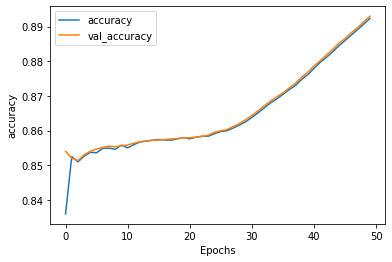

In [205]:
import matplotlib.pyplot as plt
plot_graphs(history,'accuracy')
# 20부터 조금씩 올라감을 알 수있음

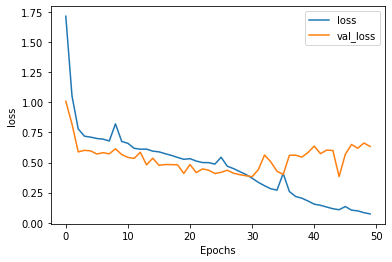

In [206]:
plot_graphs(history,'loss')  


In [208]:

SAVE_FILE_NM = "weights.h5"
model.load_weights(os.path.join(DATA_OUT_PATH, MODEL_NAME, SAVE_FILE_NM))

query = "남자친구 승진 선물로 뭐가 좋을까?"

test_index_inputs, _ = enc_processing([query], char2idx)    
predict_tokens = model.inference(test_index_inputs)
print(predict_tokens)

print(' '.join([idx2char[str(t)] for t in predict_tokens]))

[ 4928 18222 15967 19282 12841 15126]
평소에 필요했던 게 좋을 것 같아요


In [209]:
SAVE_FILE_NM = "weights.h5"
model.load_weights(os.path.join(DATA_OUT_PATH, MODEL_NAME, SAVE_FILE_NM))

query = '힘들어서 결혼할까봐'
test_index_inputs, _ = enc_processing([query], word2idx)
predict_tokens = model.inference(test_index_inputs)
print(' '.join([idx2word[t] for t in predict_tokens]))


혼자를 즐기세요


In [ ]:
data['Q']

In [ ]:
data['A']

In [ ]:
# 트랜스포머 모델
# 셀프 어텐션 : 문장에서 각 단어끼리 얼마나 관계가 있는지를 계산해서 반영하는 방법
# self attention을 써서 문장안에서 단어들간의 관계를 측정
# 

In [ ]:
inputs

In [ ]:
outputs

In [ ]:
# 데이터 전처리 
# 띄어쓰기가 아닌 형태소 단위로 토크나이즈 하는 방식으로 전처리함
os.remove(VOCAB_PATH)
index_inputs, input_seq_len= enc_processing(inputs, char2idx, tokenize_as_morph=True)
index_outputs, output_seq_len = dec_output_processing(outputs, char2idx, tokenize_as_morph =True)
index_targets = dec_target_processing(outputs, char2idx, tokenize_as_morph =True)

# Transformer

In [274]:
# 모델 구현
# 총4개의 모듈로 구성됨 : 멀티헤드 어텐션, 서브시퀀트 마스크 어텐션, 포지션와이즈 피드포워드 네트워크 리지듀얼 커넥션
import tensorflow as tf
import numpy as np

from konlpy.tag import Twitter
import pandas as pd
import tensorflow as tf
import enum
import os
import re
import json
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt


In [275]:
# 랜덤시드 고정
SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)

In [291]:

# 1. 멀티헤드 어텐션 : 간단하게 설명하면 내적 어텐션 구조가 중첩된 형태
# 1-1 스케일 내적 어텐션 : key query value로 구성됨
# 찾고자 하는 값: query, key : 사전에서 찾은 단어, value : key에 해당하는 단어의 의미

def scaled_dot_product_attention(q, k, v, mask):
    """Calculate the attention weights.
    q, k, v must have matching leading dimensions.
    k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
    The mask has different shapes depending on its type(padding or look ahead) 
    but it must be broadcastable for addition.

    Args:
    q: query shape == (..., seq_len_q, depth)
    k: key shape == (..., seq_len_k, depth)
    v: value shape == (..., seq_len_v, depth_v)
    mask: Float tensor with shape broadcastable 
          to (..., seq_len_q, seq_len_k). Defaults to None.

    Returns:
    output, attention_weights
    """

    matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)  # q k 의 곱

    # scale matmul_qk
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)   # qk /root(d)  

    # add the mask to the scaled tensor.
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)  

    # softmax is normalized on the last axis (seq_len_k) so that the scores
    # add up to 1.
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)  # soft max 함수 씌우기

    output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)   # 계산된 값에 v곱하기

    return output, attention_weights

In [251]:
# 1-2 순방향 마스크 어텐션
# 자신보다 뒤에있는 단어를 참고하지 않게 하는 기법
def create_look_ahead_mask(size):
  mask = 1- tf.linalg.band_part(tf.ones((size,size)), -1,0)
  return mask


In [283]:
###  패딩 및 포워드 마스킹 ###

def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)   #   tf.cast : 텐서를 새로운 형태로 캐스팅하는데 사용 , tf.math.equal(seq, 0) seq와 0 이 같은지를 판단하는 논리 연산자

    # add extra dimensions to add the padding
    # to the attention logits.
    return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

def create_masks(inp, tar):
    # Encoder padding mask
    enc_padding_mask = create_padding_mask(inp)

    # Used in the 2nd attention block in the decoder.
    # This padding mask is used to mask the encoder outputs.
    dec_padding_mask = create_padding_mask(inp)

    # Used in the 1st attention block in the decoder.
    # It is used to pad and mask future tokens in the input received by 
    # the decoder.
    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)

    return enc_padding_mask, combined_mask, dec_padding_mask

In [285]:
enc_padding_mask, look_ahead_mask, dec_padding_mask = create_masks(index_inputs, index_outputs)

In [289]:
enc_padding_mask

<tf.Tensor: shape=(20, 1, 1, 25), dtype=float32, numpy=
array([[[[0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]],


       [[[0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]],


       [[[0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]],


       [[[0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]],


       [[[0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]],


       [[[0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]],


       [[[0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]],


       [[[0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,

In [290]:
dec_padding_mask

<tf.Tensor: shape=(20, 1, 1, 25), dtype=float32, numpy=
array([[[[0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]],


       [[[0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]],


       [[[0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]],


       [[[0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]],


       [[[0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]],


       [[[0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]],


       [[[0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]],


       [[[0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,

In [288]:
look_ahead_mask

<tf.Tensor: shape=(20, 1, 25, 25), dtype=float32, numpy=
array([[[[0., 1., 1., ..., 1., 1., 1.],
         [0., 0., 1., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.],
         ...,
         [0., 0., 0., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.]]],


       [[[0., 1., 1., ..., 1., 1., 1.],
         [0., 0., 1., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.],
         ...,
         [0., 0., 0., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.]]],


       [[[0., 1., 1., ..., 1., 1., 1.],
         [0., 0., 1., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.],
         ...,
         [0., 0., 0., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.]]],


       ...,


       [[[0., 1., 1., ..., 1., 1., 1.],
         [0., 0., 1., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.],
         ...,
         [0., 0., 0.,

In [281]:
a= 1- tf.linalg.band_part(tf.ones((5,5)), -1,0) ; a
# 0 마스킹된것을 확인가능

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

In [282]:
create_look_ahead_mask(5)

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

In [296]:
def scaled_dot_product_attention(q,k,v, mask):
  matmul_qk = tf.matmul(q,k, transpose_b = True)

  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

  # masking에 대한 부분이 추가됨
  if mask is not None:
    scaled_attention_logits += (mask* -1e9)
  
  attention_weights = tf.nn.softmax(scaled_attention_logits, axis= -1)
  output = tf.matmul(attention_weights, v)
  return output, attention_weights

In [297]:
# 1.3 멀티헤드 어텐션
# 어텐션이 하나가 아닌 여럿에 대한 정보를 줄 수 있음
# 어텐션 맵을 여럿 만들어 다양한 특징에 대한 어텐션을 볼 수 있음
# 앞에서 구현한 내적 어텐션을 기반으로 구현됨

  
##########################################################
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, **kargs):
  # 입력  파라미터 **kargs/ 이 안에 d_model, num_heads
  # d_model : qkv의 차원을 정의하기위한 파라미터
  # num_heads : 헤드수를 정의
        super(MultiHeadAttention, self).__init__()
        self.num_heads = kargs['num_heads']
        self.d_model = kargs['d_model']

        assert self.d_model % self.num_heads == 0
# assert [조건], [오류메시지] / assert (가정 설정문)은 어떤 조건이 True임을 보증하기 위해서 사용하는 것
# assert는 뒤의 조건이 True가 아니면 AssertError를 발생
# 나머지가 발생하면 안됨 , 나머지 발생하면 error 띄움
        self.depth = self.d_model // self.num_heads   # 나누기 연산 후 소수점 이하의 수를 버리고, 정수 부분의 수만 구함
 # 스케일 내적 연산이전에 입력한 kqv에 대한 차원수를 맞추기 위한 레이어
        self.wq = tf.keras.layers.Dense(kargs['d_model'])
        self.wk = tf.keras.layers.Dense(kargs['d_model'])
        self.wv = tf.keras.layers.Dense(kargs['d_model'])

        self.dense = tf.keras.layers.Dense(kargs['d_model'])
# qkv에 대한 벡터를 헤드 수만큼 분리할 수 있게 하는 함수
# [배치차원x시퀀스차원x피처차원] > [배치차원x헤드차원x시퀀스차원x피처차원]
    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth).
        Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
        """
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])   #   a라는 텐서가 주어졌을 때, perm 인자에 축을 주면, transpose가 될 수 있다.
  # 앞에서 구한 스케일 내적 어텐션, __init__, split heads함수를 사용
    def call(self, v, k, q, mask):  # 본격적으로 multihead-attention이 작동하는 부분
        batch_size = tf.shape(q)[0]


        q = self.wq(q)  # (batch_size, seq_len, d_model)
        k = self.wk(k)  # (batch_size, seq_len, d_model)
        v = self.wv(v)  # (batch_size, seq_len, d_model)

 # 여러개의 헤드 피처에 대해어텐션이 적용된 벡터를 얻을 수 있음
        q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
        k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
        v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

        # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
        # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

        concat_attention = tf.reshape(scaled_attention, 
                                      (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

        output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)   # 출력할 멀티 헤드 어텐션 벡터를 구성함

        return output, attention_weights


In [298]:
# ffn : 트랜스포머에서 셀프어텐션 레이어를 거친 다음 ffn를 거치게됨
# 한 문장에 있는 단어 토큰 벡터 각각에 대해 연산하는 네트워크
# ffn(x) = max(0, xw1+b1) w2 + b2
  
def point_wise_feed_forward_network(**kargs):
    return tf.keras.Sequential([
      tf.keras.layers.Dense(kargs['dff'], activation='relu'),  # (batch_size, seq_len, dff)
      tf.keras.layers.Dense(kargs['d_model'])  # (batch_size, seq_len, d_model)
    ])

In [299]:
# residual connection + normalization ( ADD & NORM )
# 정보 x가 있고, 네트워크 레이어를 거쳐 나온 정보 F(x)가 있다고 하면 이 정보를 더해 앞에 있던 정보 x를 보존
# 인코더 부분에서 rc를 수행하는 부분을 보여준다


In [300]:
#self.ffn = point_wise_feed_forward_network(**kargs)  # ffn생성 , F(x)
#self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon = 1e-6) # layer norm 생성#

#ffn_output = self.ffn(out1)  # ffn
#ffn_output = self.dropout2(ffn_output) # 드랍아웃 한번 수행
#out2 = self.layernorm2(out1 + ffn_output) # F(x) + x (residual connection)

In [301]:
# Position encoding
# 두개의 수식으로 나뉨, 
# 1. 인덱스가 짝수인 경우 사인 함수값을 할당
# 2. 인덱스가 홀수인 경우 코사인 함수값을 할당
# 사인함수과 코사인 함수는 위치에 따라 피처 차원 인덱스에 각자 위치 정보를 달리 주고자 하는 의도가짐

# pos/10000 2i/dim을 계산하는 함수
def get_angles(pos, i, d_model):
  angle_rates  = 1/np.power(10000,(2+i)/np.float32(d_model))
  return pos*angle_rates

def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis], np.arange(d_model)[np.newaxis,:], d_model)
  # np.newaxis : 새로운 차원을 만드는 역할을 함, newaxis를 인덱스칸에 추가하면 새로운 차원을 만들게된다.
  # 새로운 차원을 만들면 [배치차원 x 시퀀스차원 x 피처차원]으로 구성됨
  angle_rads[:,0::2] = np.sin(angle_rads[:, 0::2]) # 짝수에 대해서는 sin
  angle_rads[:,1::2] = np.cos(angle_rads[:, 1::2]) # 홀수에 대해서는 cos

  pos_encoding = angle_rads[np.newaxis, ...]
  return tf.cast(pos_encoding, dtype = tf.float32) # tf.cast로 상수로 만든다

(1, 50, 512)


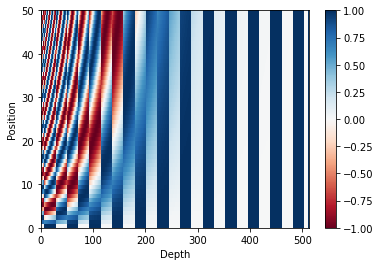

In [302]:
pos_encoding = positional_encoding(50, 512)
print (pos_encoding.shape)

plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

In [303]:
# 인코더
# 총 네개의 레이어로 구성됨 : MHA, FFN, LN, DROPOUT 
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, **kargs):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(**kargs)
        self.ffn = point_wise_feed_forward_network(**kargs)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(kargs['rate'])
        self.dropout2 = tf.keras.layers.Dropout(kargs['rate'])

    def call(self, x, mask):
        attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

        return out2

In [304]:
# encoder클래스 안에는 인코더 레이어, 워드 임베딩, 포지션 인코더 등으로 구성되어 연산을 수행

class Encoder(tf.keras.layers.Layer):
    def __init__(self, **kargs):
        super(Encoder, self).__init__()

        self.d_model = kargs['d_model']
        self.num_layers = kargs['num_layers']

        self.embedding = tf.keras.layers.Embedding(kargs['input_vocab_size'], self.d_model)
        self.pos_encoding = positional_encoding(kargs['maximum_position_encoding'], 
                                                self.d_model)


        self.enc_layers = [EncoderLayer(**kargs) 
                           for _ in range(self.num_layers)]

        self.dropout = tf.keras.layers.Dropout(kargs['rate'])

    def call(self, x, mask):

        seq_len = tf.shape(x)[1] # 포지션 임베딩때 사용됨, 벡터에 대한 시퀀스 길이를 구함
    # 포지션 임베딩의 경우 행렬의 크기가 고정돼있고, 워드 임베딩의 경우 입력 길이에 따라 가변적
    # 이 둘간의길이를 맞추기 위해 seq_len변수 설정해야함

        # adding embedding and position encoding.
        x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x, mask)

        return x  # (batch_size, input_seq_len, d_model)

In [305]:
# 디코더 : 인코더와 다르게 하나의 레이어가 추가된 형태
# 인코더의 경우, 2개의 레이어로 구성, 디코더는 3개의 레이어로 구성됨
# 두개의 어텐션과 하나의 피드포워드 레이어로 구성됨
# 첫번째 어텐션 : 디코더의 입력사이의 관계를 계산하는 셀프 어텐션 구조
# 두번째 어텐션 : 인코더의 결괏값이 들어오게 됨, 인코더와 디코더의 관계를 관계를 확인하는 구조
# 마스크 어텐션 : 첫번째 어텐션의 경우 마스크 어텐션 , 예측을 해야하는 디코더에서는 특정단어 이후의 단어를 참고하지 않도록 앞에서 말한 마스크 기법을 사용하는것

In [306]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, **kargs):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(**kargs)
        self.mha2 = MultiHeadAttention(**kargs)

        self.ffn = point_wise_feed_forward_network(**kargs)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(kargs['rate'])
        self.dropout2 = tf.keras.layers.Dropout(kargs['rate'])
        self.dropout3 = tf.keras.layers.Dropout(kargs['rate'])
    
    
    def call(self, x, enc_output, look_ahead_mask, padding_mask):
        # enc_output.shape == (batch_size, input_seq_len, d_model)
        # 디코더 벡터를 가지고 셀프 어텐션을 하는 부분
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
        attn1 = self.dropout1(attn1)
        out1 = self.layernorm1(attn1 + x)


        # 디코더 정보와 디코더 정보를 가지고 어텐션을 적용하는 과정
        attn2, attn_weights_block2 = self.mha2(
            enc_output, enc_output, out1, padding_mask)  # (batch_size, target_seq_len, d_model)
        attn2 = self.dropout2(attn2)
        out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)

        ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
        ffn_output = self.dropout3(ffn_output)
        out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)

        return out3, attn_weights_block1, attn_weights_block2

In [307]:

class Decoder(tf.keras.layers.Layer):
    def __init__(self, **kargs):
        super(Decoder, self).__init__()

        self.d_model = kargs['d_model']
        self.num_layers = kargs['num_layers']

        self.embedding = tf.keras.layers.Embedding(kargs['target_vocab_size'], self.d_model)
        self.pos_encoding = positional_encoding(kargs['maximum_position_encoding'], self.d_model)

        self.dec_layers = [DecoderLayer(**kargs) 
                           for _ in range(self.num_layers)]
        self.dropout = tf.keras.layers.Dropout(kargs['rate'])

    def call(self, x, enc_output, look_ahead_mask, padding_mask):
        seq_len = tf.shape(x)[1]
        attention_weights = {}

        x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, look_ahead_mask, padding_mask)

            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2

        # x.shape == (batch_size, target_seq_len, d_model)
        return x, attention_weights

In [308]:


class Transformer(tf.keras.Model):
    def __init__(self, **kargs):
        super(Transformer, self).__init__(name=kargs['model_name'])
        self.end_token_idx = kargs['end_token_idx']
         # 마지막 end_token에 대한 인덱스값을 저장하는 변수로서 inference 함수에서 end_token이후로는 더 이상 모델 추론을 하지않게 하는 역할
        self.encoder = Encoder(**kargs)
        self.decoder = Decoder(**kargs)

        self.final_layer = tf.keras.layers.Dense(kargs['target_vocab_size']) # 출력차원이 단어사전의 토큰수만큼 돼야함
    
    # call함수 : 디코더에 입력할 시퀀스가 주어짐
    def call(self, x):
        inp, tar = x  # 패딩 마스크와 디코더에 사용할 순방향 마스크를 create_mask를 통해 받는다

        enc_padding_mask, look_ahead_mask, dec_padding_mask = create_masks(inp, tar)
        enc_output = self.encoder(inp, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)

        # dec_output.shape == (batch_size, tar_seq_len, d_model)
        dec_output, _ = self.decoder(
            tar, enc_output, look_ahead_mask, dec_padding_mask)

        final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)

        return final_output
    

  # call함수와 비슷하지만 다른점이 있음. 디코더에 입력할 시퀀스를 매번 생성해야함
  # 시작당시에 시작 토큰만 가지고 디코더에서 다음 토큰을 생성할 수 있게 한다.
  # 이러한 생성과정을 계속 반복할 수 있도록 for문을 둠, 만약 end_token이 나온다면 생성을 멈춤

    def inference(self, x):
        inp = x  
        tar = tf.expand_dims([STD_INDEX], 0)

        enc_padding_mask, look_ahead_mask, dec_padding_mask = create_masks(inp, tar)        
        enc_output = self.encoder(inp, enc_padding_mask)
        
        predict_tokens = list()
        for t in range(0, MAX_SEQUENCE):
            dec_output, _ = self.decoder(tar, enc_output, look_ahead_mask, dec_padding_mask)
            final_output = self.final_layer(dec_output)
            outputs = tf.argmax(final_output, -1).numpy()
            pred_token = outputs[0][-1]
            if pred_token == self.end_token_idx:
                break
            predict_tokens.append(pred_token)
            tar = tf.expand_dims([STD_INDEX] + predict_tokens, 0)
            _, look_ahead_mask, dec_padding_mask = create_masks(inp, tar)
            
        return predict_tokens

In [309]:
prepro_configs

{'char2idx': {'<PAD>': 0,
  '<SOS>': 1,
  '<END>': 2,
  '<UNK>': 3,
  '상담': 4,
  '나가볼까': 5,
  '지압이나': 6,
  '점이': 7,
  '먹고네요': 8,
  '앞둬도': 9,
  '벋어나는': 10,
  '지우개가': 11,
  '머뭇거리는': 12,
  '어떤건지': 13,
  '힘드네ㅜㅜ': 14,
  '반갑습니다': 15,
  '고백했는데': 16,
  '잊기로': 17,
  '뭐길래': 18,
  '사랑스러울': 19,
  '모순': 20,
  '누구한테': 21,
  '조용한': 22,
  '그러게요그만큼': 23,
  '보고싶어서': 24,
  '기르고': 25,
  '행복하실': 26,
  '받나요': 27,
  '만나다보면': 28,
  '부치지': 29,
  '정이': 30,
  '만나겠죠': 31,
  '늘어': 32,
  '좋아해지지': 33,
  '끌려': 34,
  '기침도': 35,
  '걸린만큼': 36,
  '늘어요': 37,
  '구워': 38,
  '반영되었나봐요': 39,
  '감정에는': 40,
  '잡아가는데': 41,
  '미끄러질': 42,
  '막막하겠네요': 43,
  '바닥이야': 44,
  '매세요': 45,
  '찍어주세요': 46,
  '상태인': 47,
  '선물받고': 48,
  '30이네': 49,
  '괜찮다가': 50,
  '생일이었는데': 51,
  '장점을': 52,
  '초초하다': 53,
  '방안': 54,
  '거래요': 55,
  '사람의': 56,
  '가득한가봐요': 57,
  '못자는': 58,
  '믿었습니다': 59,
  '의사': 60,
  '발전되지': 61,
  '당하고': 62,
  '회의감': 63,
  '일이니까요': 64,
  '미용실에서': 65,
  '의사를': 66,
  '낮잠은': 67,
  '인생의': 68,
  '돼버렸어': 69,
  '아파하고': 70,
  '좋을거죠': 71,

In [326]:
#  모델 하이퍼파라미터 정의
char2idx = prepro_configs['char2idx']
# word2idx = prepro_configs['word2idx']
end_index = prepro_configs['end_symbol']
model_name = 'transformer'
vocab_size = prepro_configs['vocab_size']
BATCH_SIZE = 2
MAX_SEQUENCE = 25
EPOCHS = 50  # 30
VALID_SPLIT = 0.1  

kargs = {'model_name': model_name,
         'num_layers': 2,
         'd_model': 512,
         'num_heads': 8,
         'dff': 2048,
         'input_vocab_size': vocab_size,
         'target_vocab_size': vocab_size,
         'maximum_position_encoding': MAX_SEQUENCE,
         'end_token_idx': char2idx[end_index],
         'rate': 0.1
        }



In [327]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')

def loss(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

def accuracy(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    mask = tf.expand_dims(tf.cast(mask, dtype=pred.dtype), axis=-1)
    pred *= mask    
    acc = train_accuracy(real, pred)

    return tf.reduce_mean(acc)



In [328]:
# callback  선언
# overfitting을 막기 위한 ealrystop 추가
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=10)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)

checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

/content/transformer -- Folder already exists 



In [329]:
model=[]

In [330]:
model = Transformer(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss = loss, metrics = [accuracy])
history = model.fit([index_inputs, index_outputs], index_targets, 
                    batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

Epoch 1/50
7/9 [======================>.......] - ETA: 0s - loss: 1.6942 - accuracy: 0.8311
Epoch 00001: val_accuracy improved from -inf to 0.85400, saving model to /content/transformer/weights.h5
9/9 [==============================] - 5s 180ms/step - loss: 1.7380 - accuracy: 0.8360 - val_loss: 1.3934 - val_accuracy: 0.8540
Epoch 2/50
7/9 [======================>.......] - ETA: 0s - loss: 1.6407 - accuracy: 0.8523
Epoch 00002: val_accuracy improved from 0.85400 to 0.85600, saving model to /content/transformer/weights.h5
9/9 [==============================] - 1s 78ms/step - loss: 1.5697 - accuracy: 0.8527 - val_loss: 1.3106 - val_accuracy: 0.8560
Epoch 3/50
7/9 [======================>.......] - ETA: 0s - loss: 1.4134 - accuracy: 0.8575
Epoch 00003: val_accuracy improved from 0.85600 to 0.85667, saving model to /content/transformer/weights.h5
9/9 [==============================] - 1s 79ms/step - loss: 1.4615 - accuracy: 0.8572 - val_loss: 1.2114 - val_accuracy: 0.8567
Epoch 4/50
7/9 [==

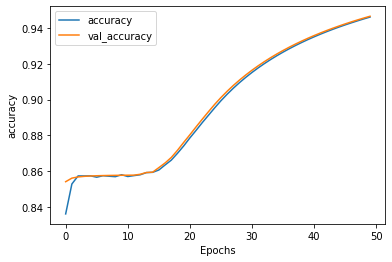

In [331]:
plot_graphs(history, 'accuracy')

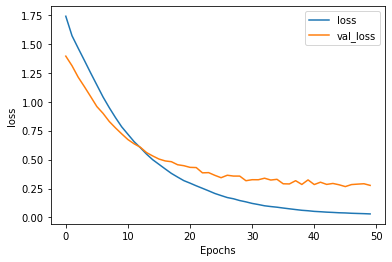

In [332]:
plot_graphs(history, 'loss')

In [336]:
# 베스트 모델 불러오기
DATA_OUT_PATH = '/content/transformer/'
SAVE_FILE_NM = 'weights.h5'

model.load_weights(os.path.join(DATA_OUT_PATH, SAVE_FILE_NM))

In [341]:
text = "남자친구 승진 선물로 뭐가 좋을까?"
text_index_inputs , _ = enc_processing([text], word2idx)
outputs = model.inference(test_index_inputs)
print(' '.join([idx2char[str(o)] for o in outputs]))

평소에 필요했던 게 좋을 것 같아요
